## Recommendation of Kdramas 

### Let's start by importing libraries which are necessary for future work

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the csv file from kaggle

In [2]:
df = pd.read_csv('koreanTV.csv')

### head function is used to view first 5 rows from dataset

In [3]:
df.head()

,Title,Year,Rating,Votes:,Time,Genre,Stars,Short Story
0,Hellbound,(2021– ),6.7,"14,032",150 min,"Crime, Drama, Fantasy","Yoo Ah-in, Kim Hyun-joo, Jeong Min Park, Jin-a...",\nPeople hear predictions on when they will di...
1,Squid Game,(2021– ),8.1,"339,931",55 min,"Action, Drama, Mystery","Lee Jung-jae, Park Hae-soo, Wi Ha-Joon, Jung H...",\nHundreds of cash-strapped players accept a s...
2,My Name,(2021– ),7.9,"12,877",50 min,"Action, Crime, Drama","Hee-soon Park, Ahn Bo-Hyun, Han So-hee, Kim Sa...",\nThe story about a woman who joins an organiz...
3,Miraculous: Tales of Ladybug & Cat Noir,(2015– ),7.7,"9,439",20 min,"Animation, Action, Adventure","Cristina Valenzuela, Bryce Papenbrook, Keith S...","\nMarinette and Adrien, two normal teens, tran..."
4,Happiness,(2021– ),8.6,921,-,"Action, Fantasy, Thriller","Han Hyo-joo, Park Hyung-Sik, Woo-jin Jo, Lee J...",\nAn apocalyptic thriller that takes place in ...


### columns helps us to know the present columns present in the dataset

In [4]:
df.columns

Index(['Title', 'Year', 'Rating', 'Votes:', 'Time', 'Genre', 'Stars',
       'Short Story'],
      dtype='object')

### duplicated function with sum is used to get the information regarding any duplicate value present in the data

In [5]:
df.duplicated().sum()

0

### Now it's time to check whether our dataset hold any missing values or not

In [6]:
df.isnull().sum()

Title           0
Year           11
Rating          0
Votes:          0
Time            0
Genre           0
Stars           0
Short Story     0
dtype: int64

### For further analysis and keep our work more simple let's create a function which will lowercase the values of the rows

In [7]:
#Lowercasing all the string values
def lower_string(text):
    return text.lower()

### Below is the example of the function let's now apply it on our data columns

In [8]:
lower_string('HELLO EVERYONE DATA SCIENCE TEAM IS HERE')

'hello everyone data science team is here'

In [9]:
# TITLE, GENRE, STARS, SHORT STORY
df['Title'] = df['Title'].apply(lower_string)
df['Genre'] = df['Genre'].apply(lower_string)
df['Stars'] = df['Stars'].apply(lower_string)
df['Short Story'] = df['Short Story'].apply(lower_string)

### All the values present in the dataset is now converted to lowercase

In [10]:
df.head()

,Title,Year,Rating,Votes:,Time,Genre,Stars,Short Story
0,hellbound,(2021– ),6.7,"14,032",150 min,"crime, drama, fantasy","yoo ah-in, kim hyun-joo, jeong min park, jin-a...",\npeople hear predictions on when they will di...
1,squid game,(2021– ),8.1,"339,931",55 min,"action, drama, mystery","lee jung-jae, park hae-soo, wi ha-joon, jung h...",\nhundreds of cash-strapped players accept a s...
2,my name,(2021– ),7.9,"12,877",50 min,"action, crime, drama","hee-soon park, ahn bo-hyun, han so-hee, kim sa...",\nthe story about a woman who joins an organiz...
3,miraculous: tales of ladybug & cat noir,(2015– ),7.7,"9,439",20 min,"animation, action, adventure","cristina valenzuela, bryce papenbrook, keith s...","\nmarinette and adrien, two normal teens, tran..."
4,happiness,(2021– ),8.6,921,-,"action, fantasy, thriller","han hyo-joo, park hyung-sik, woo-jin jo, lee j...",\nan apocalyptic thriller that takes place in ...


### Defining a function to remove the \n present in the short story column

In [12]:
def token_text(text):
    return " ".join(text.split())

In [13]:
token_text("'\npeople hear predictions on when they will die. when that time comes, a death angel appears in front of them and kills them.'")

"' people hear predictions on when they will die. when that time comes, a death angel appears in front of them and kills them.'"

In [14]:
df['Short Story'] = df['Short Story'].apply(token_text)

In [15]:
df.head()

,Title,Year,Rating,Votes:,Time,Genre,Stars,Short Story
0,hellbound,(2021– ),6.7,"14,032",150 min,"crime, drama, fantasy","yoo ah-in, kim hyun-joo, jeong min park, jin-a...",people hear predictions on when they will die....
1,squid game,(2021– ),8.1,"339,931",55 min,"action, drama, mystery","lee jung-jae, park hae-soo, wi ha-joon, jung h...",hundreds of cash-strapped players accept a str...
2,my name,(2021– ),7.9,"12,877",50 min,"action, crime, drama","hee-soon park, ahn bo-hyun, han so-hee, kim sa...",the story about a woman who joins an organized...
3,miraculous: tales of ladybug & cat noir,(2015– ),7.7,"9,439",20 min,"animation, action, adventure","cristina valenzuela, bryce papenbrook, keith s...","marinette and adrien, two normal teens, transf..."
4,happiness,(2021– ),8.6,921,-,"action, fantasy, thriller","han hyo-joo, park hyung-sik, woo-jin jo, lee j...",an apocalyptic thriller that takes place in a ...


### info function gives us the overview of the dataset by providing information regarding the non-null values and data type of the features in the dataset

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        1989 non-null   object
 1   Year         1978 non-null   object
 2   Rating       1989 non-null   object
 3   Votes:       1989 non-null   object
 4   Time         1989 non-null   object
 5   Genre        1989 non-null   object
 6   Stars        1989 non-null   object
 7   Short Story  1989 non-null   object
dtypes: object(8)
memory usage: 124.4+ KB


In [17]:
df['Year'][0]

'(2021– )'

### Now will fill in the null values which are present in the dataset

In [21]:
df.fillna(value=0,inplace=True)

In [22]:
df.tail()

,Title,Year,Rating,Votes:,Time,Genre,Stars,Short Story
1984,untitled k-pop latin american project,0,-,-,-,reality-tv,-,young men from latin america audition for an o...
1985,bite sisters,(2021),7.4,5,-,"fantasy, romance","kang han-na, kim yeong-ah, yu-hwa choi, lee si...",this story follows han yi na a vampire who sud...
1986,adult trainee,(2021– ),7.1,10,-,"comedy, romance","mi-yeon cho, ryu eui-hyun, lee chan hyung, yoo...",add a plot
1987,a good supper,(2021),-,-,-,romance,-,add a plot
1988,user not found,(2021– ),-,-,-,"drama, romance",-,add a plot


In [23]:
df.isnull().sum()

Title          0
Year           0
Rating         0
Votes:         0
Time           0
Genre          0
Stars          0
Short Story    0
dtype: int64

### If we look at our Rating feature then there's an issue with it i.e instead of null values it is marked as  " - "  (hypen)

#### Let's now create a function to solve this problem

In [25]:
for i in range(len(df['Rating'])):
   
    data = df.loc[i,'Rating'].split('.')
    if data[0] == '-':
        df.loc[i,'Rating'] = 0
    else:
        df.loc[i,'Rating'] = int(data[0])+(int(data[1])/10)

df['Rating']

0       6.7
1       8.1
2       7.9
3       7.7
4       8.6
       ... 
1984      0
1985    7.4
1986    7.1
1987      0
1988      0
Name: Rating, Length: 1989, dtype: object

### Now all the hypen marked values are converted to 0

In [26]:
df.tail()

,Title,Year,Rating,Votes:,Time,Genre,Stars,Short Story
1984,untitled k-pop latin american project,0,0,-,-,reality-tv,-,young men from latin america audition for an o...
1985,bite sisters,(2021),7.4,5,-,"fantasy, romance","kang han-na, kim yeong-ah, yu-hwa choi, lee si...",this story follows han yi na a vampire who sud...
1986,adult trainee,(2021– ),7.1,10,-,"comedy, romance","mi-yeon cho, ryu eui-hyun, lee chan hyung, yoo...",add a plot
1987,a good supper,(2021),0,-,-,romance,-,add a plot
1988,user not found,(2021– ),0,-,-,"drama, romance",-,add a plot


### Here we need to change the name of Votes: to Votes because it's really difficult to manage with inconsistent name

In [29]:
df.rename(columns=lambda x: x.replace('Votes:','Votes'),inplace=True)
df.columns

Index(['Title', 'Year', 'Rating', 'Votes', 'Time', 'Genre', 'Stars',
       'Short Story'],
      dtype='object')

### Here there's same problem as we had with ratings so let's solve it too

In [31]:
for i in range(len(df['Votes'])):
    if df.loc[i,'Votes'] == '-':
        df.loc[i,'Votes'] = 0
    else:
        if isinstance(df.loc[i,'Votes'],str) and ',' in df.loc[i,'Votes']:
            df.loc[i,'Votes'] = int(df.loc[i,'Votes'].replace(',',''))

In [33]:
df.tail()

,Title,Year,Rating,Votes,Time,Genre,Stars,Short Story
1984,untitled k-pop latin american project,0,0,0,-,reality-tv,-,young men from latin america audition for an o...
1985,bite sisters,(2021),7.4,5,-,"fantasy, romance","kang han-na, kim yeong-ah, yu-hwa choi, lee si...",this story follows han yi na a vampire who sud...
1986,adult trainee,(2021– ),7.1,10,-,"comedy, romance","mi-yeon cho, ryu eui-hyun, lee chan hyung, yoo...",add a plot
1987,a good supper,(2021),0,0,-,romance,-,add a plot
1988,user not found,(2021– ),0,0,-,"drama, romance",-,add a plot


### In time feature we have data in mins and it will be bit tough to work with it afterwards so let's remove the mins and hypen to 0.

In [35]:
for i in range(len(df['Time'])):
    if df.loc[i,'Time'] == '-':
        df.loc[i,'Time'] = 0
    else:
        df.loc[i,'Time'] = int(df.loc[i,'Time'].replace('min',''))

        df['Time']

In [37]:
df.head()

,Title,Year,Rating,Votes,Time,Genre,Stars,Short Story
0,hellbound,(2021– ),6.7,14032,150,"crime, drama, fantasy","yoo ah-in, kim hyun-joo, jeong min park, jin-a...",people hear predictions on when they will die....
1,squid game,(2021– ),8.1,339931,55,"action, drama, mystery","lee jung-jae, park hae-soo, wi ha-joon, jung h...",hundreds of cash-strapped players accept a str...
2,my name,(2021– ),7.9,12877,50,"action, crime, drama","hee-soon park, ahn bo-hyun, han so-hee, kim sa...",the story about a woman who joins an organized...
3,miraculous: tales of ladybug & cat noir,(2015– ),7.7,9439,20,"animation, action, adventure","cristina valenzuela, bryce papenbrook, keith s...","marinette and adrien, two normal teens, transf..."
4,happiness,(2021– ),8.6,921,0,"action, fantasy, thriller","han hyo-joo, park hyung-sik, woo-jin jo, lee j...",an apocalyptic thriller that takes place in a ...


### We have a problem with year column that is we have 2021- and we want it to be 2021 so now let's do the needful

In [38]:
df['Release_year'] = df['Year'].apply(lambda y: str(y).split("-")[0]).replace('\D+','',regex=True)

### We are now dropping the previous Year column because we created new one i.e Release Year

In [40]:
df.drop('Year',axis=1,inplace=True)

In [57]:
df.sample(5)

,Title,Rating,Votes,Time,Genre,Stars,Short Story,Release_year
1675,bike family,0.0,0,0,family,-,a family of aliens finds friendship and a comm...,2015
1209,unemployed romance,6.5,43,0,"comedy, romance","young-ah lee, min namkoong, seul-ki bae, seo d...",im seung hee (lee young ah) scribbles her days...,2013
1140,haeundae lovers,5.8,59,0,"comedy, romance","yeo-jeong cho, seok-won jeong, min-kyung kang,...",hardcore prosecutor lee tae sung (kim kang woo...,2012
1376,mother's sea,7.1,7,60,drama,"min-su choi, young jae dok-go, hyun-jung go, k...",young hee has lead a comfortable and financial...,1993
1104,goong s,6.1,65,60,"comedy, drama, romance","ho-jin chun, jae-yeong ha, yi-jae heo, ha jae-...",winning the hand of the queen means becoming t...,2007


### We need to convert the object values which need to be numeric to numeric

In [48]:
for col in ['Release_year','Rating','Votes','Time']:
    df[col] = df[col].apply(pd.to_numeric)

### To get an overview regarding frequency of each genre let's create a function and then the dataframe

In [61]:
# Extracting the genre
g_list = list()
for g in df['Genre'].to_list():
    for genre in g.split(', '):
        if genre!= "-":
            g_list.append(genre)
from collections import Counter
genre_df = pd.DataFrame.from_dict(Counter(g_list),orient='index',columns=['Frequency']).reset_index()
genre_df = genre_df.rename(columns={'index':'Category'})
genre_df = genre_df.sort_values('Frequency',ascending=False)

In [63]:
genre_df.shape

(26, 2)

### Below is category with the frequency of genre

In [64]:
genre_df.head()

,Category,Frequency
1,drama,990
10,romance,715
9,comedy,493
5,animation,186
3,action,183


### According the analysis the more viewed Kdramas are of Drama, Romance and Comedy genre

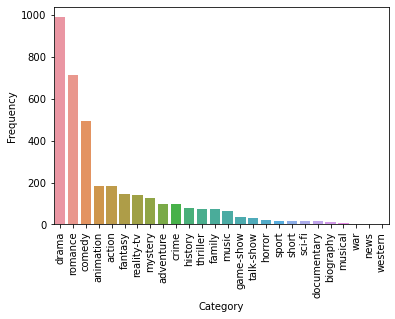

In [69]:
sns.barplot(x=genre_df['Category'],y=genre_df['Frequency'])
plt.xticks(rotation=90)
plt.show()

### We have successfully converted the data type of object to integer (which we mentioned above)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         1989 non-null   object 
 1   Rating        1989 non-null   float64
 2   Votes         1989 non-null   int64  
 3   Time          1989 non-null   int64  
 4   Genre         1989 non-null   object 
 5   Stars         1989 non-null   object 
 6   Short Story   1989 non-null   object 
 7   Release_year  1989 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 124.4+ KB


### Let's again get a glance at our data and our analysis till now

In [71]:
df.head()

,Title,Rating,Votes,Time,Genre,Stars,Short Story,Release_year
0,hellbound,6.7,14032,150,"crime, drama, fantasy","yoo ah-in, kim hyun-joo, jeong min park, jin-a...",people hear predictions on when they will die....,2021
1,squid game,8.1,339931,55,"action, drama, mystery","lee jung-jae, park hae-soo, wi ha-joon, jung h...",hundreds of cash-strapped players accept a str...,2021
2,my name,7.9,12877,50,"action, crime, drama","hee-soon park, ahn bo-hyun, han so-hee, kim sa...",the story about a woman who joins an organized...,2021
3,miraculous: tales of ladybug & cat noir,7.7,9439,20,"animation, action, adventure","cristina valenzuela, bryce papenbrook, keith s...","marinette and adrien, two normal teens, transf...",2015
4,happiness,8.6,921,0,"action, fantasy, thriller","han hyo-joo, park hyung-sik, woo-jin jo, lee j...",an apocalyptic thriller that takes place in a ...,2021


### Let's now view the most rated kdrama which is nothing but Snowdrop

In [89]:
df.loc[df['Rating']==10.0]

,Title,Rating,Votes,Time,Genre,Stars,Short Story,Release_year
41,snowdrop,10.0,140,70,"drama, romance","jung hae-in, jisoo kim, yoo in-na, lee jung-hyun",adapted from the handwritten notes of a man wh...,2021


### Below is the dataframe of kdramas rated as 9.0 and above it

In [168]:
df.loc[df['Rating']>=9.0]

,Title,Rating,Votes,Time,Genre,Stars,Short Story,Release_year,tags
41,snowdrop,10.0,140,70,"drama, romance","jung hae-in, jisoo kim, yoo in-na, lee jung-hyun",adapted from the handwritten notes of a man wh...,2021,"drama, romancejung hae-in, jisoo kim, yoo in-n..."
49,reply 1988,9.1,5643,90,"comedy, drama, family","hyeri lee, go kyung-pyo, ryu jun-yeol, park bo...",follows the lives of 5 families living on the ...,20152016,"comedy, drama, familyhyeri lee, go kyung-pyo, ..."
58,my mister,9.1,4827,70,"drama, family","sun-kyun lee, ji-eun lee, ji-ah lee, park ho-san",a man in his 40's withstands the weight of lif...,2018,"drama, familysun-kyun lee, ji-eun lee, ji-ah l..."
91,bad and crazy,9.1,20,0,"crime, mystery","lee dong-wook, han ji-eun, hak-yeon cha, wi ha...",a mystery drama in which detectives with diffe...,2021,"crime, mysterylee dong-wook, han ji-eun, hak-y..."
100,running man,9.0,2938,80,"comedy, game-show, reality-tv","jae-suk yoo, jong-kook kim, haha, kwang-soo lee",running man is a reality-variety show where th...,2010,"comedy, game-show, reality-tvjae-suk yoo, jong..."
106,in the soop bts ver.,9.5,593,0,reality-tv,"rm, jin, suga, j-hope",the members of bts enjoy the beauty of the soo...,2020,"reality-tvrm, jin, suga, j-hopethe members of ..."
190,baradeon bada,9.5,71,80,"music, reality-tv","jong-shin yoon, ji-ah lee, lee dong-wook, onew",the cast members open a bar on the sea side an...,2021,"music, reality-tvjong-shin yoon, ji-ah lee, le..."
383,bts: bon voyage,9.6,908,0,reality-tv,"bts, j-hope, jimin, jin",bts: bon voyage is a reality show about member...,2016,"reality-tvbts, j-hope, jimin, jinbts: bon voya..."
402,run bts!,9.7,1013,0,game-show,"rm, v, jin, jimin",run bts (dallyeola bangtan!) is a south korean...,2015,"game-showrm, v, jin, jiminrun bts (dallyeola b..."
510,bts: burn the stage,9.2,1526,30,documentary,"bts, v, jimin, jungkook",kpop boy band bts share their journey and stru...,2018,"documentarybts, v, jimin, jungkookkpop boy ban..."


In [169]:
top_kdramas = df.loc[df['Rating']>=9.0].head(10)

In [170]:
top_kdramas = top_kdramas.iloc[:,0:2]

### Below is the barplot of top 10 kdramas

C:\Users\Sakshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


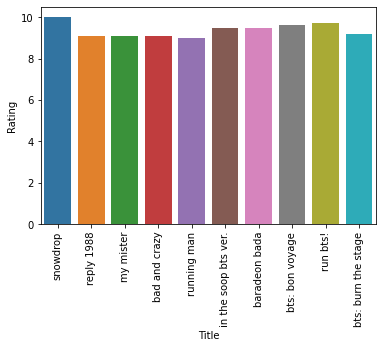

In [171]:
sns.barplot(top_kdramas['Title'],top_kdramas['Rating'])
plt.xticks(rotation=90)
plt.show()

In [106]:
df.columns

Index(['Title', 'Rating', 'Votes', 'Time', 'Genre', 'Stars', 'Short Story',
       'Release_year'],
      dtype='object')

### Now we need to consider genre,stars and short story features as one single feature

In [116]:
df['tags'] = df['Genre']+df['Stars']+df['Short Story']

In [117]:
df.head()

,Title,Rating,Votes,Time,Genre,Stars,Short Story,Release_year,tags
0,hellbound,6.7,14032,150,"crime, drama, fantasy","yoo ah-in, kim hyun-joo, jeong min park, jin-a...",people hear predictions on when they will die....,2021,"crime, drama, fantasyyoo ah-in, kim hyun-joo, ..."
1,squid game,8.1,339931,55,"action, drama, mystery","lee jung-jae, park hae-soo, wi ha-joon, jung h...",hundreds of cash-strapped players accept a str...,2021,"action, drama, mysterylee jung-jae, park hae-s..."
2,my name,7.9,12877,50,"action, crime, drama","hee-soon park, ahn bo-hyun, han so-hee, kim sa...",the story about a woman who joins an organized...,2021,"action, crime, dramahee-soon park, ahn bo-hyun..."
3,miraculous: tales of ladybug & cat noir,7.7,9439,20,"animation, action, adventure","cristina valenzuela, bryce papenbrook, keith s...","marinette and adrien, two normal teens, transf...",2015,"animation, action, adventurecristina valenzuel..."
4,happiness,8.6,921,0,"action, fantasy, thriller","han hyo-joo, park hyung-sik, woo-jin jo, lee j...",an apocalyptic thriller that takes place in a ...,2021,"action, fantasy, thrillerhan hyo-joo, park hyu..."


#### Let's import cosine similarity for further improvements and recommendations

In [107]:
from sklearn.metrics.pairwise import cosine_similarity

In [121]:
new_tags = df['tags']

In [124]:
df['tags'][0]

'crime, drama, fantasyyoo ah-in, kim hyun-joo, jeong min park, jin-ah wonpeople hear predictions on when they will die. when that time comes, a death angel appears in front of them and kills them.'

#### Now we need to create object of CountVectorize class

In [113]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')

In [125]:
vectors = cv.fit_transform(df['tags']).toarray()

In [126]:
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [143]:
similarity = cosine_similarity(vectors)

In [144]:
similarity.shape

(1989, 1989)

### Let's now create a function using cosine similarity to provide user content based recommendation

In [149]:
def recommend(drama):
    drama_index = df[df['Title']==drama].index[0]
    distances = similarity[drama_index]
    drama_list = sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:6]
    
    for i in drama_list:
        print(df.iloc[i[0]].Title)
    

### Below is the recommendation of the dramma run bts

In [163]:
recommend('run bts!')

bts gayo
bts: bon voyage
bts: burn the stage
elsword: el lady
love letter
